In [1]:
import numpy as np
from typing import Tuple
import networkx as nx

In [2]:
from tnestmodel.temp_fast_graph import SparseTempFastGraph, FastGraph, get_total_degree, TempFastGraph
from tnestmodel.visualization import draw_networkx_causal, draw_networkx_temp, to_color

In [3]:
from tnestmodel.temp_generation import temporal_Gnp
from nestmodel.graph_properties import number_of_flips_possible

In [39]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

  0%|          | 0/500000 [00:00<?, ?it/s]

[6 2 2]
[4 4 1]
[6 2 2]
array([[0, 5, 0],
       [2, 3, 0],
       [1, 4, 0],
       [1, 3, 0],
       [4, 5, 0],
       [0, 2, 1],
       [0, 5, 1],
       [2, 3, 1],
       [1, 4, 1],
       [0, 5, 2],
       [2, 3, 2],
       [1, 4, 2],
       [1, 3, 2],
       [4, 5, 2]], dtype=int64)



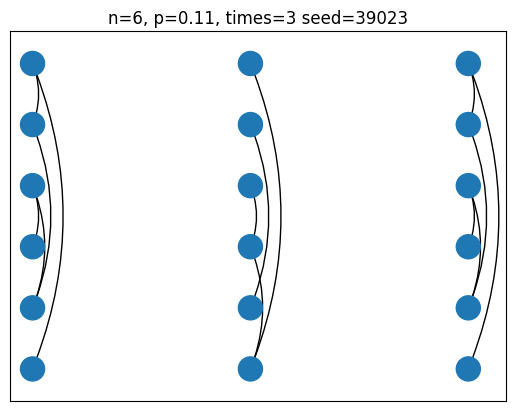

[2 1 1]
[3 1 1]
[3 3 3]
array([[0, 2, 0],
       [0, 5, 0],
       [2, 3, 0],
       [3, 5, 0],
       [4, 0, 1],
       [4, 2, 1],
       [0, 3, 1],
       [2, 5, 1],
       [0, 5, 2],
       [1, 2, 2],
       [3, 4, 2]], dtype=int64)



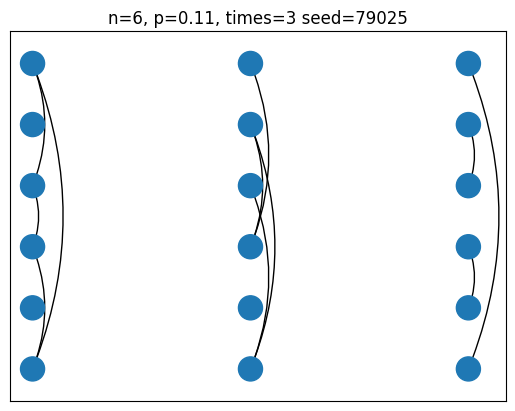

[3 1 1]
[3 1 1]
[3 1 1]
array([[0, 1, 0],
       [3, 1, 0],
       [0, 4, 0],
       [3, 5, 0],
       [0, 1, 1],
       [3, 1, 1],
       [0, 4, 1],
       [3, 5, 1],
       [0, 1, 2],
       [3, 1, 2],
       [0, 4, 2],
       [3, 5, 2]], dtype=int64)



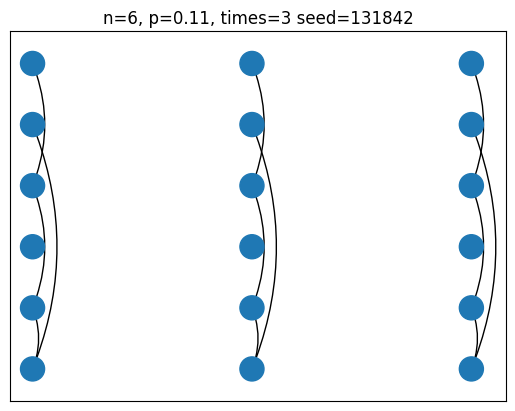

[3 1 1]
[4 1 1]
[2 2 2]
array([[0, 3, 0],
       [2, 5, 0],
       [0, 4, 0],
       [2, 4, 0],
       [1, 4, 1],
       [0, 2, 1],
       [0, 5, 1],
       [2, 3, 1],
       [0, 2, 2],
       [0, 5, 2],
       [2, 3, 2],
       [3, 5, 2]], dtype=int64)



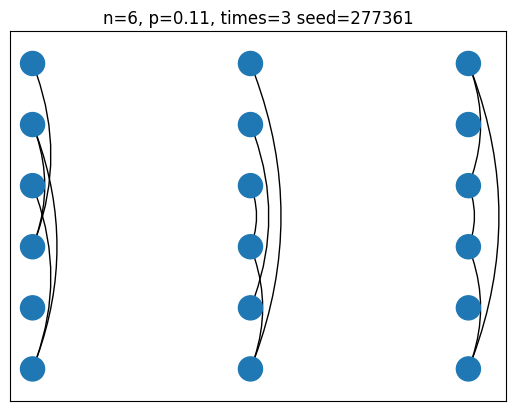

[3 1 1]
[2 1 1]
[4 4 4]
array([[0, 5, 0],
       [1, 2, 0],
       [3, 4, 0],
       [2, 4, 1],
       [2, 0, 1],
       [4, 5, 1],
       [0, 5, 1],
       [2, 0, 2],
       [2, 1, 2],
       [4, 3, 2],
       [4, 5, 2]], dtype=int64)



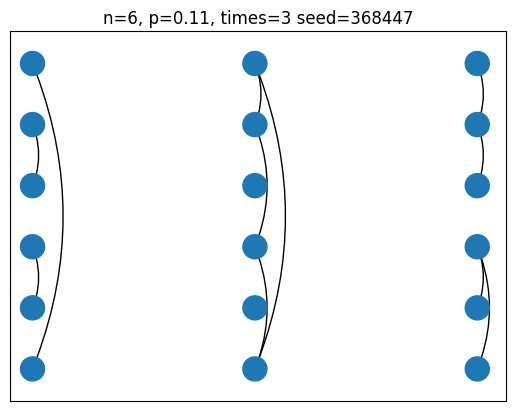

[4 1 1]
[6 2 2]
[6 2 2]
array([[0, 2, 0],
       [0, 5, 0],
       [2, 3, 0],
       [1, 4, 0],
       [1, 4, 1],
       [1, 3, 1],
       [4, 5, 1],
       [5, 0, 1],
       [3, 2, 1],
       [1, 4, 2],
       [1, 3, 2],
       [4, 5, 2],
       [5, 0, 2],
       [3, 2, 2]], dtype=int64)



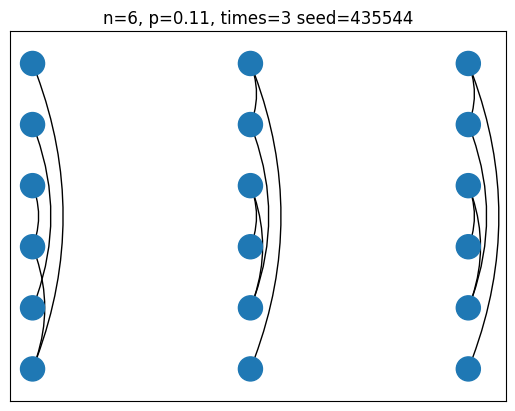

[3 3 1]
[3 1 1]
[4 1 1]
array([[0, 1, 0],
       [0, 4, 0],
       [1, 5, 0],
       [4, 3, 0],
       [2, 3, 1],
       [2, 5, 1],
       [1, 3, 1],
       [4, 5, 1],
       [0, 2, 2],
       [0, 5, 2],
       [2, 3, 2],
       [1, 4, 2]], dtype=int64)



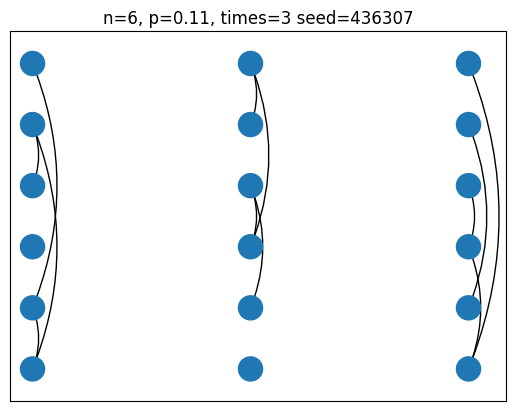

[3 1 1]
[3 3 3]
[3 3 3]
array([[1, 5, 0],
       [3, 5, 0],
       [1, 2, 0],
       [3, 4, 0],
       [0, 5, 1],
       [1, 2, 1],
       [3, 4, 1],
       [0, 5, 2],
       [1, 2, 2],
       [3, 4, 2]], dtype=int64)



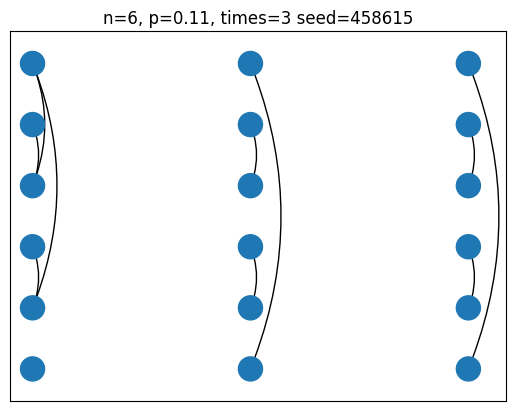

In [49]:
"""Find temporal graphs that can be rewired and have two rounds of wl"""
for seed in tqdm(range(500_000)):
    n= 6
    p=0.11
    n_times = 3
    G = temporal_Gnp(n, p, n_times, seed=seed)
    if G.to_temporal_edges().shape[0]==0: # empty graphs
        continue
    
    G = G.to_dense()
    cols = G.calc_wl()
    G.apply_wl_colors_to_slices(cols)
    #plt.figure()
    #draw_networkx_temp(G, colors=0, transpose=True)
    num_iterations = G.slices[0].base_partitions.shape[0]
    if num_iterations < 2:
        continue
    is_good = True
    if len(G.slices)<3:
        continue
    for _slice in G.slices:
        if _slice.edges.shape[0] == 0:
            is_good=False
        if number_of_flips_possible(_slice)[-1] == 0:
            is_good = False
        if number_of_flips_possible(_slice)[0] == 1:
            is_good = False
    if not is_good:
        continue
    for _slice in G.slices:
        print(number_of_flips_possible(_slice))
    print(repr(G.to_temporal_edges()))
    print()
    plt.figure()
    draw_networkx_temp(G, colors=0)
    plt.title(f"n={n}, p={p}, times={n_times} seed={seed}")
    plt.show()

In [6]:
G.slices[0].base_partitions.shape[0]

3

In [32]:
temporal_Gnp(5, 0.11, 3, seed=seed).to_temporal_edges()

array([], shape=(0, 3), dtype=int64)

In [7]:
edges0 = np.array([(0,1),[2,1]], dtype=np.uint32)
edges1 = np.array([[1,2], (2,3)], dtype=np.uint32)
edges2 = np.array([[2,3]], dtype=np.uint32)
edges3 = np.array([[0,1],[1,2], [2,0]], dtype=np.uint32)
G = SparseTempFastGraph([edges0.copy(), edges1.copy(), edges2, edges3, edges0], is_directed=False)
G2 = TempFastGraph([edges0.copy(), edges1.copy(), edges2, edges3, edges0], is_directed=False)

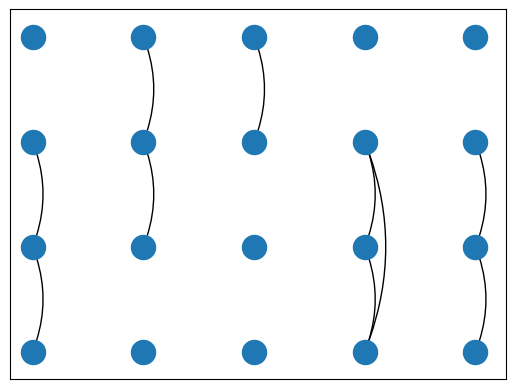

In [8]:
draw_networkx_temp(G2)

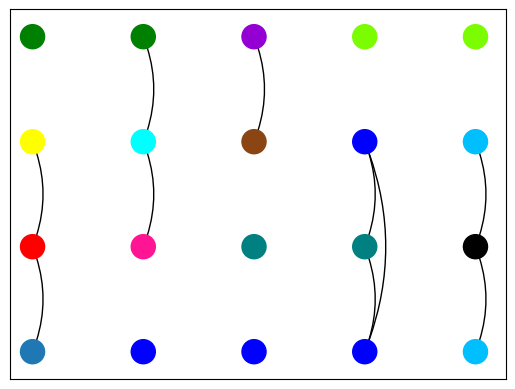

In [9]:
draw_networkx_temp(G2, colors=2)

max_d 2


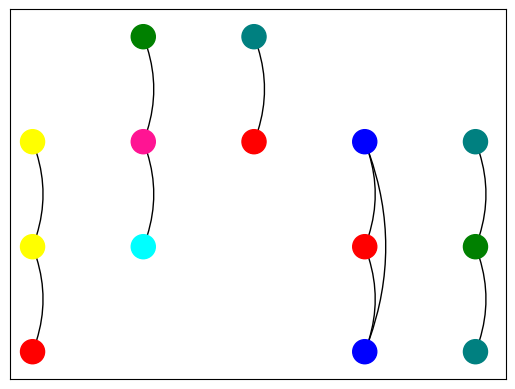

In [10]:
draw_networkx_temp(G, colors = 1)

max_d 2


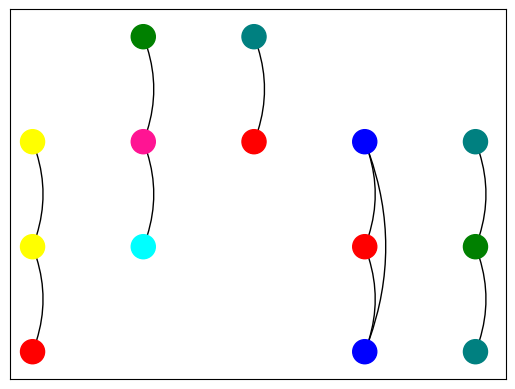

In [11]:
draw_networkx_temp(G, colors = 1)

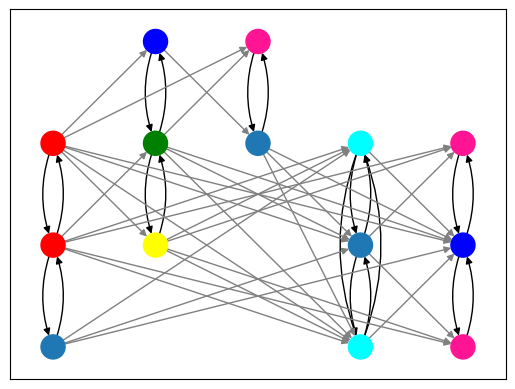

In [12]:
draw_networkx_causal(G.get_sparse_causal_completion(), colors=1)

In [13]:
from tnestmodel.visualization import to_color
import networkx as nx

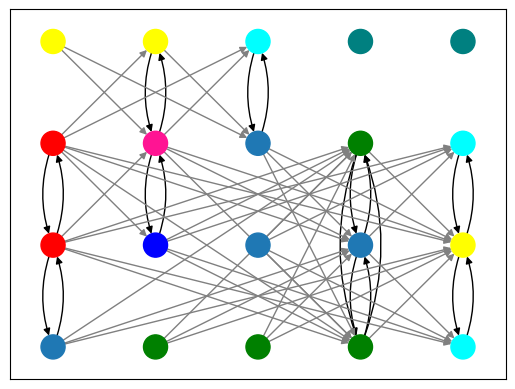

In [14]:
draw_networkx_causal(G2.get_causal_completion(), labels=False, colors=1)

In [15]:
edges0 = np.array([[0,1], [1,2]], dtype=np.uint32)
edges1 = np.array([[1,2]], dtype=np.uint32)
edges2 = np.array([[0,1], [1,2]], dtype=np.uint32)
edges3 = np.array([[0,1]], dtype=np.uint32)
G3 = SparseTempFastGraph([edges0, edges1, edges2, edges3, edges1], is_directed=True)
G3_d = TempFastGraph([edges0, edges1, edges2, edges3, edges1], is_directed=True)

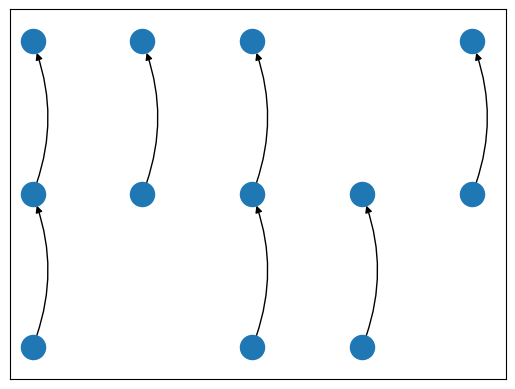

In [16]:
draw_networkx_temp(G3)

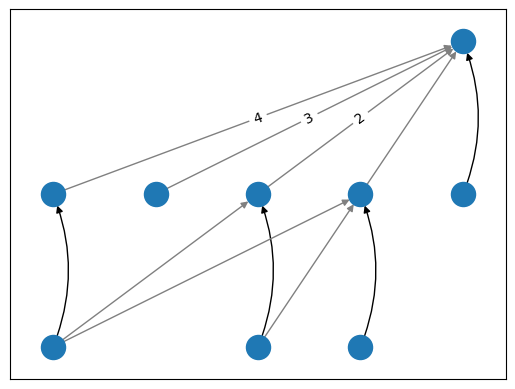

In [17]:
draw_networkx_causal(G3.get_sparse_causal_completion())

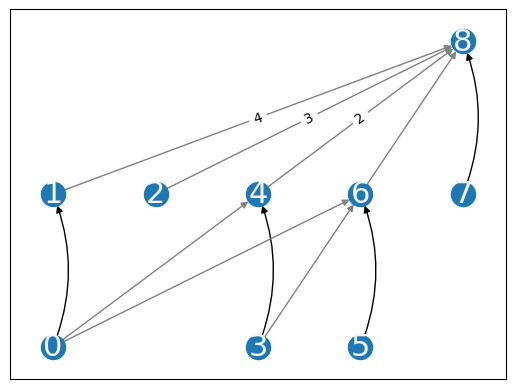

In [18]:
draw_networkx_causal(G3.get_sparse_causal_completion(), labels=True)

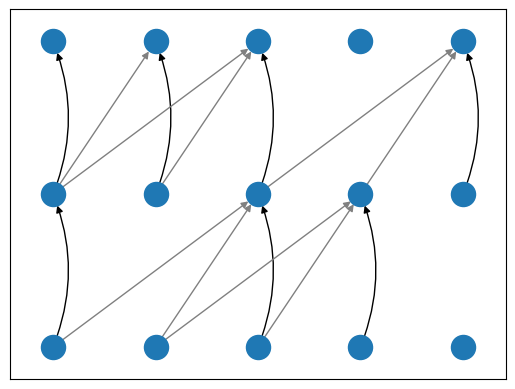

In [19]:
G3_d.r = 2
draw_networkx_causal(G3_d.get_restless_causal_completion(), labels=False)

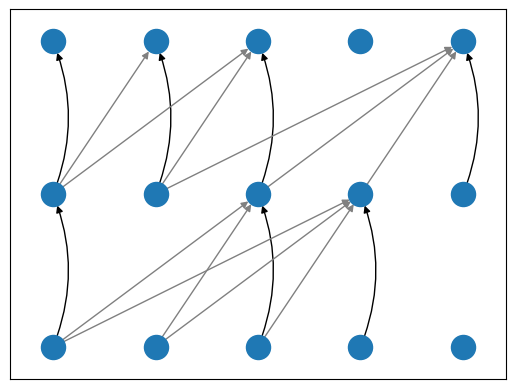

In [20]:
G3_d.r = 3
draw_networkx_causal(G3_d.get_restless_causal_completion(), labels=False)